In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
new_model = pickle.load(open('svcmodel.pkl','rb'))

In [3]:
new_tunned_Model = pickle.load(open('tunnedModel.pkl','rb'))

In [4]:
image_data= pickle.load(open('mydata.pkl','rb'))

In [5]:
import random
random.shuffle(image_data)
features=[]
labels=[]

for feature,label in image_data:
    features.append(feature)
    labels.append(label)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(features,labels,test_size=0.3)

## prediction with normal model

In [7]:
prediction = new_model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(prediction,y_test))
print(confusion_matrix(prediction,y_test))

0.9333333333333333
[[76  0  2  8]
 [ 2 88  0  2]
 [ 0  0 65  2]
 [ 2  1  1 51]]


## prediction with tunned model

In [8]:
prediction_tune = new_tunned_Model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(prediction_tune,y_test))
print(confusion_matrix(prediction_tune,y_test))

0.9666666666666667
[[77  0  3  3]
 [ 1 89  0  0]
 [ 0  0 65  1]
 [ 2  0  0 59]]


### Here ,we are getting 93% accuracy with the normal model and 96.6% accuracy with hypertunned model

## Now checking for a single random image

In [9]:
import cv2
import os
import numpy as np
categories = ['algae','clean','oil_spill','plastic']
data=[]
dir = "C:\\WaterContaminationProject\\dataset"
path = os.path.join(dir,categories[1])
img = os.listdir(path)[50]
imagepath = os.path.join(path,img)
water_image = cv2.imread(imagepath,0)
water_image=cv2.resize(water_image,(150,150))
image= np.array(water_image).flatten()
data.append(image)


In [10]:
prediction = new_model.predict(data)

prediction is clean


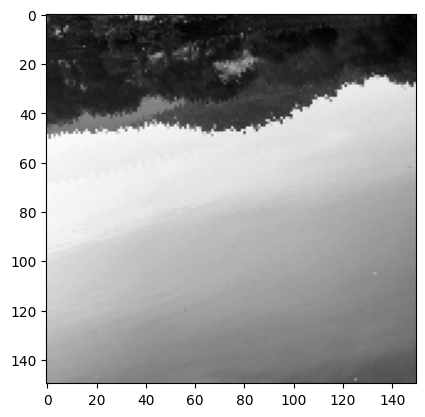

In [11]:
print("prediction is", categories[prediction[0]])

real_image = image.reshape(150,150)
plt.imshow(real_image,cmap='gray')
plt.show()